# AE 663 - SDES PROJECT I

In this Notebook, we will look at the solution to the Van der Pol oscillator.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation, rc
from IPython.display import HTML

## Van der Pol Oscillator

In dynamics, the Van der Pol oscillator is a non-conservative oscillator with non-linear damping. It evolves in time according to the second-order differential equation:

\begin{equation}\
\frac{d^2 x}{dt^2}+\mu(x^2-1)\frac{dx}{dt}+x=0
\end{equation}
where x is the position coordinate—which is a function of the time t, and μ is a scalar parameter indicating the nonlinearity and the strength of the damping.

In [15]:
def damping_factor(mu):
    def van_der_pol_dynamics(x, t):
        x1 = x[1]
        x2 = -mu * (x[0] ** 2.0 - 1.0) * x[1] - x[0]
        result = np.array([x1, x2])
        return result
    return van_der_pol_dynamics

## Initial conditions

Lets take the initial conditions for solving this problem to be as:
    \begin{equation}
    \begin{split}
    x(0) = 2.0 \\
    \dot{x}(0) = 0.5
    \end{split}
    \end{equation}

## Case 1: $\mu$ = 0.0

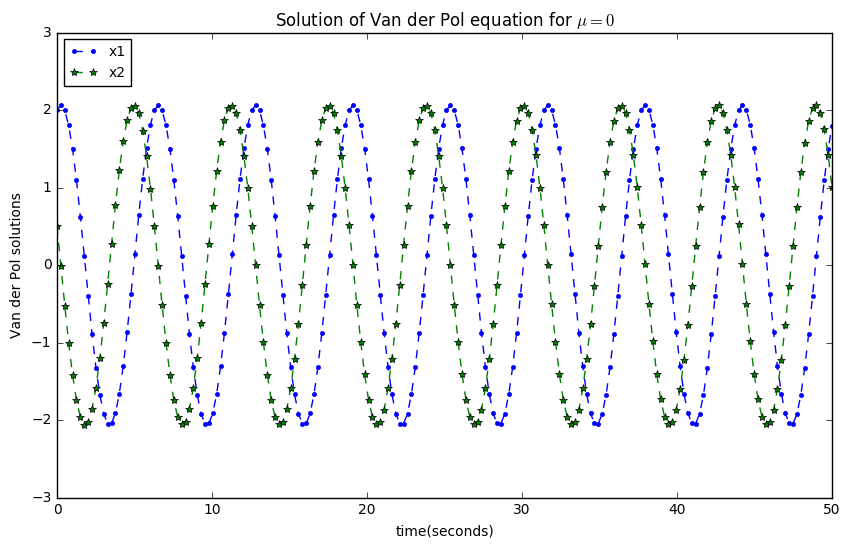

In [16]:
d = damping_factor(0.0)
t = np.linspace(0.0,50.0, 200)
x = odeint(d, [2,0.5], t)
plt.figure(figsize=(10,6))
plt.plot(t, x[:,0], marker='.', linestyle='--', label='x1')
plt.plot(t, x[:,1], marker='*', linestyle='--', label='x2')
plt.legend(loc=2,prop={'size':10})
plt.title("Solution of Van der Pol equation for $\mu = 0$", fontsize=12)
plt.xlabel("time(seconds)", fontsize=10)
plt.ylabel("Van der Pol solutions", fontsize=10)
plt.show()

## Case 2: $\mu$ = 1.0

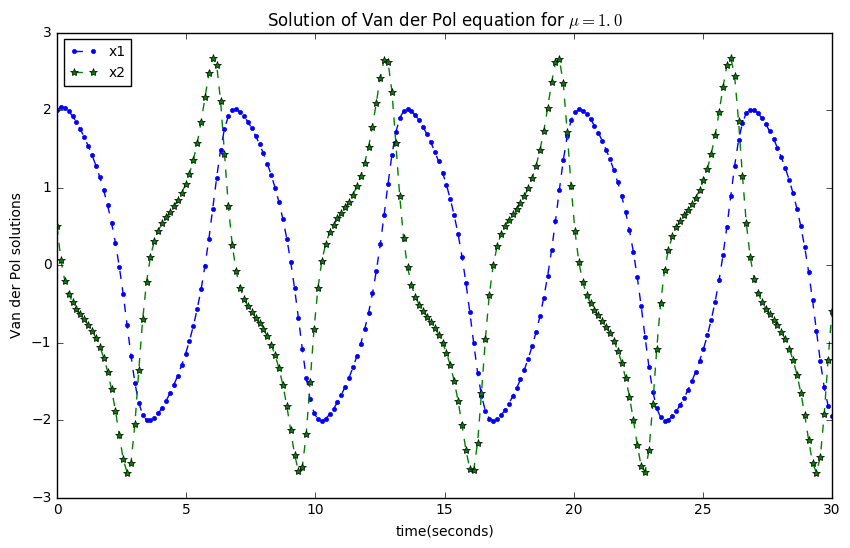

In [17]:
d = damping_factor(1.0)
t = np.linspace(0.0,30.0, 200)
x = odeint(d, [2,0.5], t)
plt.figure(figsize=(10,6))
plt.plot(t, x[:,0], marker='.', linestyle='--', label='x1')
plt.plot(t, x[:,1], marker='*', linestyle='--', label='x2')
plt.legend(loc=2,prop={'size':10})
plt.title("Solution of Van der Pol equation for $\mu = 1.0$", fontsize=12)
plt.xlabel("time(seconds)", fontsize=10)
plt.ylabel("Van der Pol solutions", fontsize=10)
plt.show()

## Case 3: $\mu$ = 1000.0

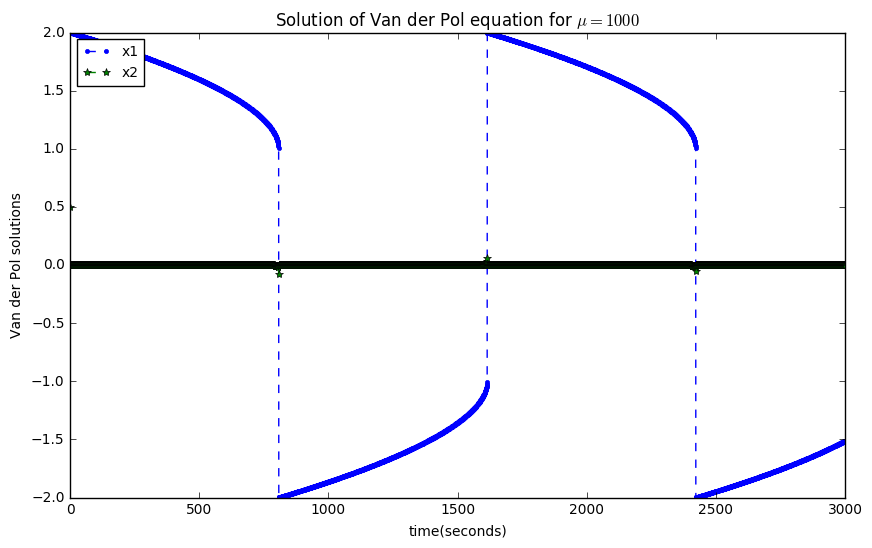

In [18]:
d = damping_factor(1000)
t = np.linspace(0.0,3000.0, 5000)
x = odeint(d, [2,0.5], t)
plt.figure(figsize=(10,6))
plt.plot(t, x[:,0], marker='.', linestyle='--', label='x1')
plt.plot(t, x[:,1], marker='*', linestyle='--', label='x2')
plt.legend(loc=2,prop={'size':10})
plt.title("Solution of Van der Pol equation for $\mu = 1000$", fontsize=12)
plt.xlabel("time(seconds)", fontsize=10)
plt.ylabel("Van der Pol solutions", fontsize=10)
plt.show()

## Animation

In [19]:
d = damping_factor(1.0)
t = np.linspace(0.0,30.0, 200)
x = odeint(d, [2,0.5], t)
a = np.asarray(x[:, 0])
b = np.asarray(x[:, 1])

fig, ax = plt.subplots()

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())

ax.set_xlim(( 0, 30.0))
ax.set_ylim((-3.0, 3.0))
ax.set_xlabel('Time(seconds)')
ax.set_ylabel('Van der Pol solutions')
ax.set_title('130010061')

line, = ax.plot([], [], lw=2, label='x1')
line1, = ax.plot([], [], lw=2, label='x2')
ax.legend()

def init():
    line.set_data([], [])
    line1.set_data([], [])
    return (line,)

def animate(i):
    x = t[:i]
    y = a[:i]
    y1 = b[:i]
    line.set_data(x, y)
    line1.set_data(x, y1)
    return (line, line1)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=100, blit=True)

anim.save('Vanderpol_solutions.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
display_animation(anim)

In [20]:
fig, ax = plt.subplots()

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())

ax.set_xlim((-3.0, 3.0))
ax.set_ylim((-3.0, 3.0))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('130010061')

line, = ax.plot([], [], lw=2, label='x1')
line1, = ax.plot([], [], lw=2, label='x2')
ax.legend()

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = a[:i]
    y = b[:i]
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)

anim.save('Limit_cycle.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
display_animation(anim)